In [1]:
#   绘图和可视化

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

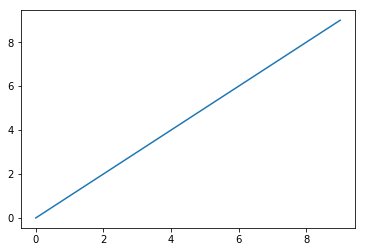

In [12]:
plt.plot(np.arange(10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f04e6446710>,
      dtype=object)

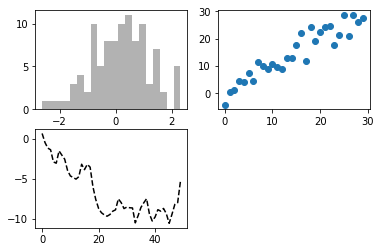

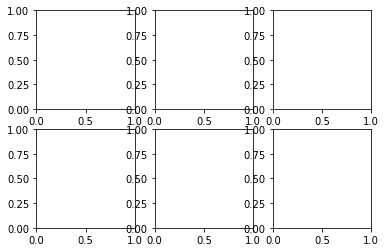

In [28]:
fig = plt.figure()#   fig相当于面板，画图必须创建子图 
#   下标从1开始
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
plt.plot(np.random.randn(50).cumsum(), 'k--')
ax1.hist(np.random.randn(100), bins = 20, color = 'k', alpha = 0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
#---------------------------------------------------------#
fig, axes = plt.subplots(2, 3)
axes


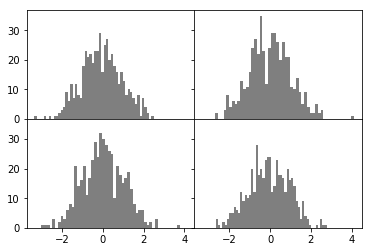

In [33]:
fig, axes = plt.subplots(2, 2, sharex = True, sharey = True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins = 50, color = 'k', alpha = 0.5)
plt.subplots_adjust(wspace = 0, hspace = 0)        

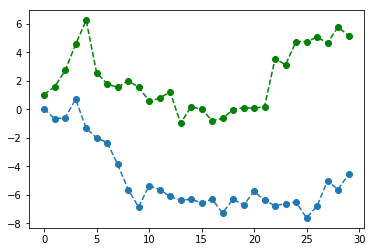

In [38]:
plt.plot(np.random.randn(30).cumsum(), 'go--')
plt.plot(np.random.randn(30).cumsum(), linestyle = 'dashed', marker = 'o')

Text(0.5,0,'stage')

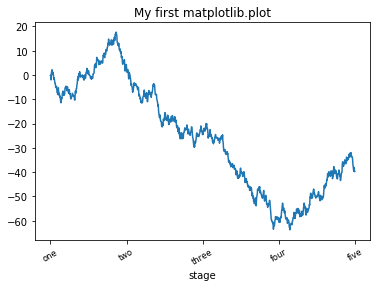

In [46]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], 
                           rotation = 30, fontsize = 'small')
ax.set_title('My first matplotlib.plot')
ax.set_xlabel('stage')

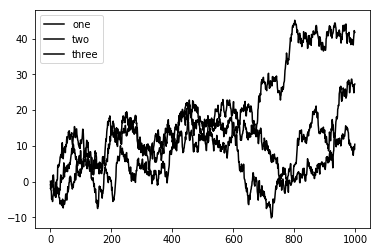

In [57]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum(), 'k', label = 'one')
ax.plot(np.random.randn(1000).cumsum(), 'k', label = 'two')
ax.plot(np.random.randn(1000).cumsum(), 'k', label = 'three')
ax.legend(loc = 'best')

Text(0.5,1,'Important dates in 2008-2009 financial crisis')

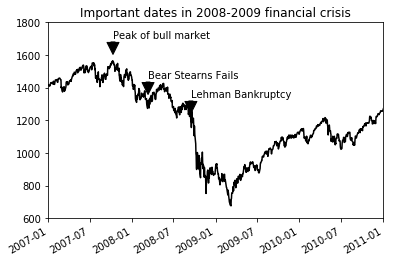

In [68]:
from datetime import datetime
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
data = pd.read_csv('/home/haoran/文档/exm/spx.csv', index_col = 0, parse_dates = True)
spx = data['SPX']
spx.plot(ax = ax, style = 'k-')
crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]
for date, label in crisis_data:
    ax.annotate(label, xy = (date, spx.asof(date) + 50),
               xytext = (date, spx.asof(date) + 200),
               arrowprops = dict(facecolor = 'black'),
               horizontalalignment = 'left', verticalalignment = 'top')
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])
ax.set_title('Important dates in 2008-2009 financial crisis')

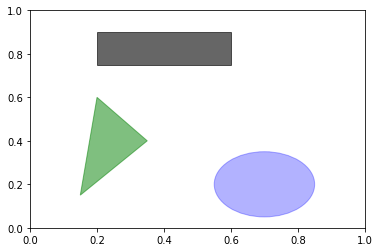

In [84]:
#   添加图形'
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color = 'k', alpha = 0.6)
circ = plt.Circle((0.7, 0.2), 0.15, color = 'b', alpha = 0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color = 'g', alpha = 0.5) 
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)
plt.savefig('figpatch.png', dpi = 400, bbox_inches = 'tight')
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()
#    StringIO => BytesIO

In [88]:
#   设置默认信息
#plt.rc('figure', figsize = (10, 10))

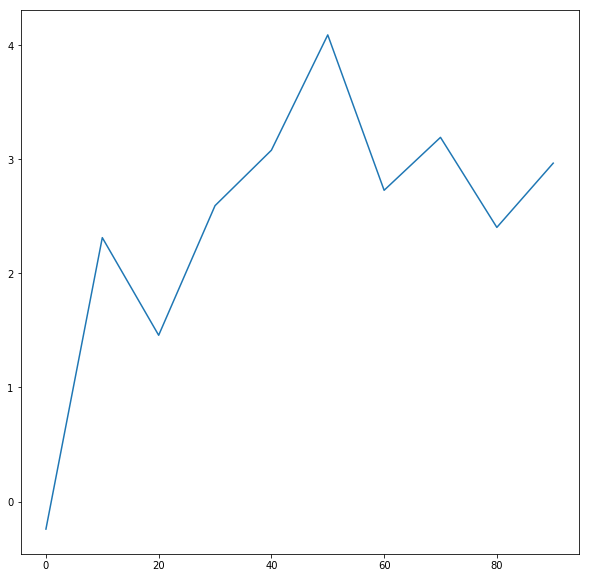

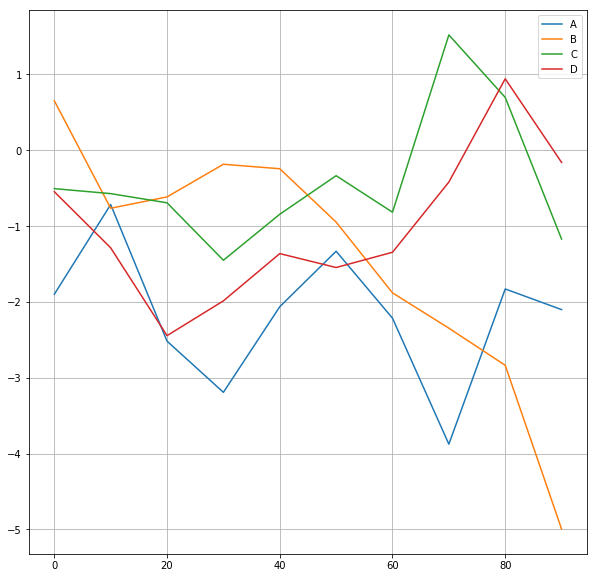

In [99]:
#   默认线性图
s = Series(np.random.randn(10).cumsum(), index = np.arange(0, 100, 10))
s.plot()
df = DataFrame(np.random.randn(10, 4).cumsum(0), columns = ['A', 'B', 'C', 'D'],
              index = np.arange(0, 100, 10))
df.plot(grid = True)

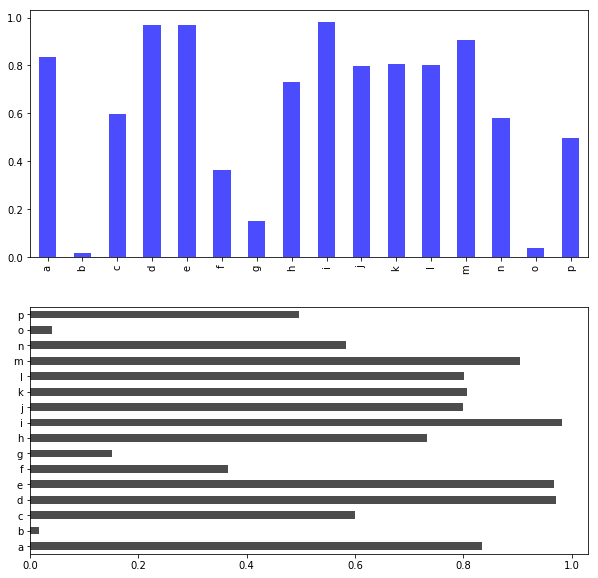

In [109]:
fig, axes = plt.subplots(2, 1)
data = Series(np.random.rand(16), index = list('abcdefghijklmnop'))
data.plot(kind = 'barh', ax = axes[1], color = 'k', alpha = 0.7)
data.plot(kind = 'bar', ax = axes[0], color = 'b', alpha = 0.7)

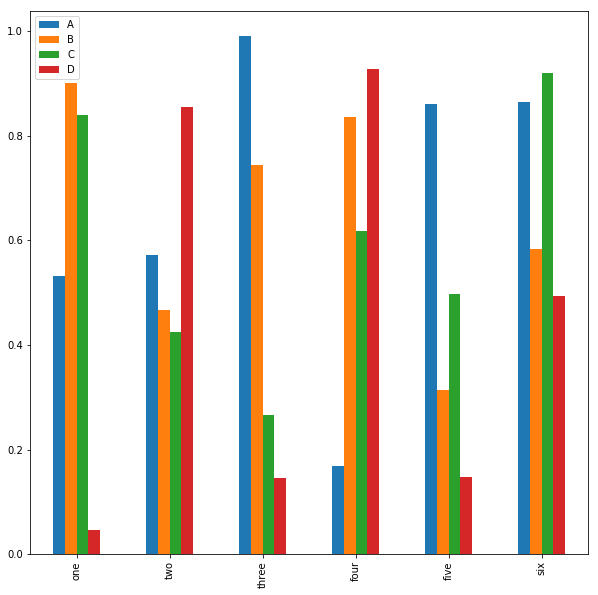

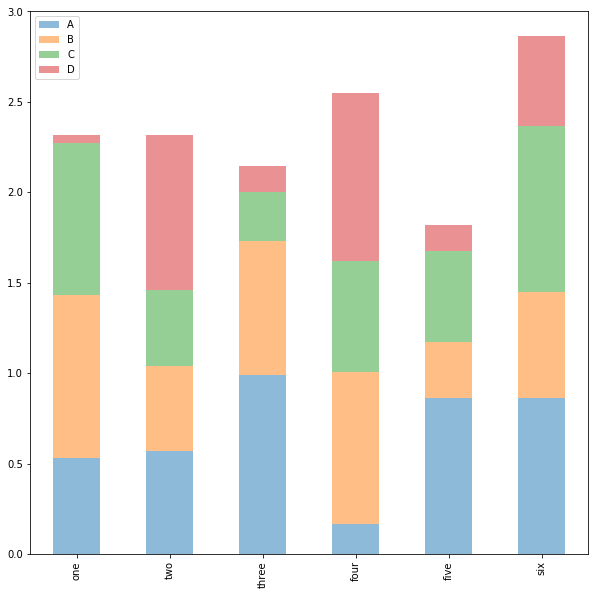

In [115]:
df = DataFrame(np.random.rand(6, 4), index = ['one', 'two', 'three', 'four', 'five', 'six'],
              columns = pd.Index(['A', 'B', 'C', 'D'], names = 'Genus'))
df
df.plot(kind = 'bar')#   每一行划分成一组
df.plot(kind = 'bar', stacked = True, alpha = 0.5)

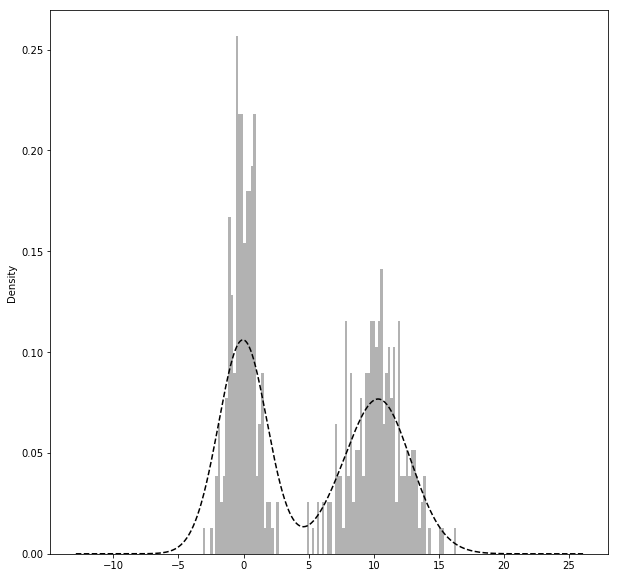

In [122]:
comp1 = np.random.normal(0, 1, size = 200)#   N(0, 1)
comp2 = np.random.normal(10, 2, size = 200)#   N(10, 4)
values = Series(np.concatenate([comp1, comp2]))
values
values.hist(bins = 100, alpha = 0.3, color = 'k', density = True)
values.plot(kind = 'kde', style = 'k--')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f04e269d7f0>,
      dtype=object)

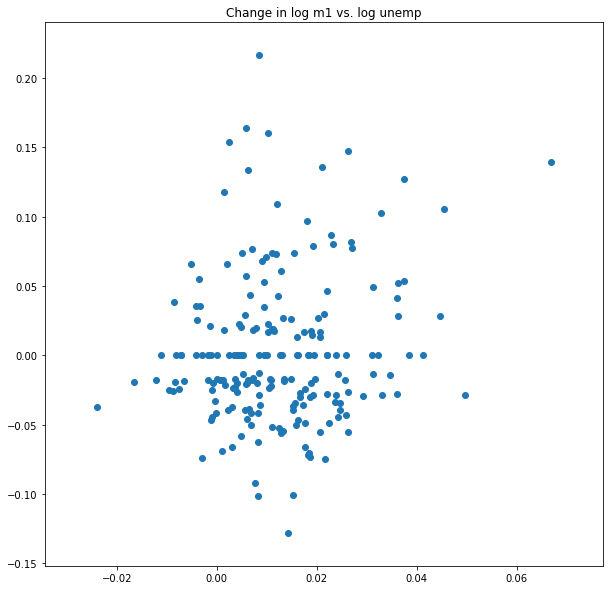

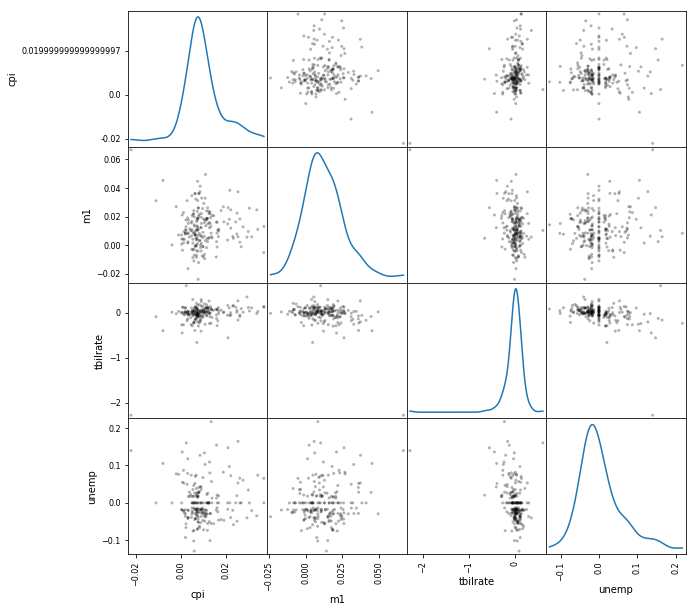

In [134]:
#   比较两个一维数据的关系的有效手段
macro = pd.read_csv('/home/haoran/文档/exm/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5: ]
plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Change in log %s vs. log %s' %('m1', 'unemp'))
pd.plotting.scatter_matrix(trans_data, diagonal = 'kde', color = 'k', alpha = 0.3)
#   pd.scatter_matrix => pd.plotting.scatter_matrix

In [44]:
data = pd.read_csv('Haiti.csv')
data
data[['INCIDENT DATE', 'LATITUDE', 'LONGITUDE']][: 10]
data['CATEGORY'][: 6]
data.describe()
data = data[(data.LATITUDE > 18) & (data.LATITUDE < 20) &
           (data.LONGITUDE > -75) & (data.LONGITUDE < -70) &
           data.CATEGORY.notnull()]
def to_cat_list(catstr):
    stripped = (x.strip() for x in catstr.split(','))
    return [x for x in stripped if x]

def get_all_categories(cat_series):
    cat_sets = (set(to_cat_list(x)) for x in cat_series)
    return sorted(set.union(*cat_sets))

def get_english(cat):
    code, names = cat.split('.')
    if '|' in names:
        names = names.split('|')[1]
    return code, names.strip()
#get_english('2. Ugrence lodsn| Vital Lines')


all_cats = get_all_categories(data.CATEGORY)
enlish_mapping = dict(get_english(x) for x in all_cats)
enlish_mapping['6c']


def get_code(seq):
    return [x.split('.')[0] for x in seq if x]

all_codes = get_code(all_cats)
code_index = pd.Index(np.unique(all_codes))
dummy_frame = DataFrame(np.zeros((len(data), len(code_index))), 
                        index = data.index, columns = code_index)

for row, cat in zip(data.index, data.CATEGORY):
    codes = get_code(to_cat_list(cat))
    dummy_frame.loc[row, codes] = 1

data = data.join(dummy_frame.add_prefix('category_'))
data.iloc[:, 10: 15]
data
import mpl_toolkits
from mpl_toolkits.basemap import Basemap

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'